# 연구과제 풀이

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import datetime as dt
import numpy as np
import seaborn as sb
from pandas import read_excel, merge
from matplotlib import pyplot as plt

### [2] 그래프 전역 설정

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

## 문제1

### 데이터 가져오기

In [3]:
df1 = read_excel("https://data.hossam.kr/pydata/kings_life.xlsx", index_col='왕')
df1.head()

,수명
왕,
태조,73
정종,62
태종,45
세종,53
문종,38


### 수명에 대한 기술 통계량

In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
수명,27.0,46.037037,16.173296,16.0,33.0,45.0,56.0,82.0


### 상자그림 시각화

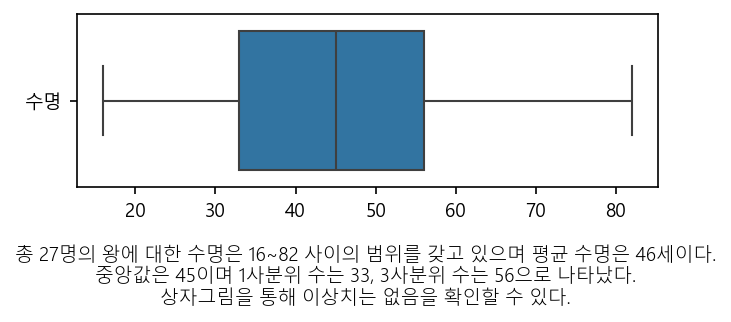

In [5]:
plt.figure(figsize=(5, 1.5), dpi=150)
sb.boxplot(data=df1, orient='h')

txt = """총 27명의 왕에 대한 수명은 16~82 사이의 범위를 갖고 있으며 평균 수명은 46세이다.
중앙값은 45이며 1사분위 수는 33, 3사분위 수는 56으로 나타났다.
상자그림을 통해 이상치는 없음을 확인할 수 있다."""
plt.figtext(0.51, -0.15, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 9, "weight": "light"})

plt.show()
plt.close()

## 문제2

### 데이터 가져오기

In [6]:
df2 = read_excel("https://data.hossam.kr/pydata/stock.xlsx")
df2.head()

,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135


### 서브플롯을 활용 상자그림

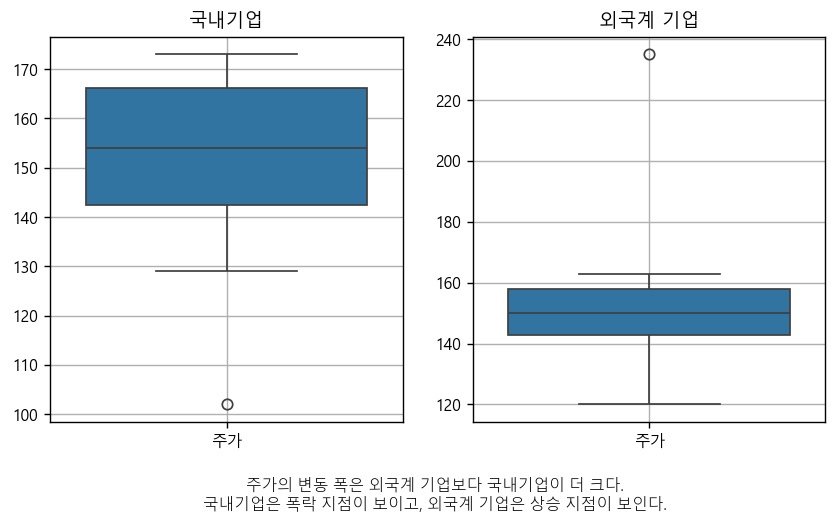

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=125)
sb.boxplot(data=df2[df2['구분'] == 'K'], ax=ax1)
sb.boxplot(data=df2[df2['구분'] == 'F'], ax=ax2)

ax1.set_title('국내기업')
ax1.grid()

ax2.set_title('외국계 기업')
ax2.grid()

txt = """주가의 변동 폭은 외국계 기업보다 국내기업이 더 크다.
국내기업은 폭락 지점이 보이고, 외국계 기업은 상승 지점이 보인다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 9, "weight": "light"})

plt.show()
plt.close()

## 문제3

### 데이터 가져오기

In [8]:
df3 = read_excel("https://data.hossam.kr/pydata/grape.xlsx")
df3

,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


In [9]:
df3A = df3[df3['비료종류'] == 'A']
df3A

,비료종류,수확량
0,A,39.3
2,A,26.6
3,A,23.7
5,A,28.5
6,A,24.2
7,A,17.9
10,A,24.3


In [10]:
df3B = df3[df3['비료종류'] == 'B']
df3B

,비료종류,수확량
1,B,11.4
4,B,25.8
8,B,16.5
9,B,21.1


### 기술통계량

In [11]:
merge(df3A.describe(),
      df3B.describe(),
      left_index=True, right_index=True).T.rename(index={'수확량_x': 'A', '수확량_y': 'B'})

,count,mean,std,min,25%,50%,75%,max
A,7.0,26.357143,6.578211,17.9,23.950,24.3,27.550,39.3
B,4.0,18.700000,6.172520,11.4,15.225,18.8,22.275,25.8


### 상자그림 시각화

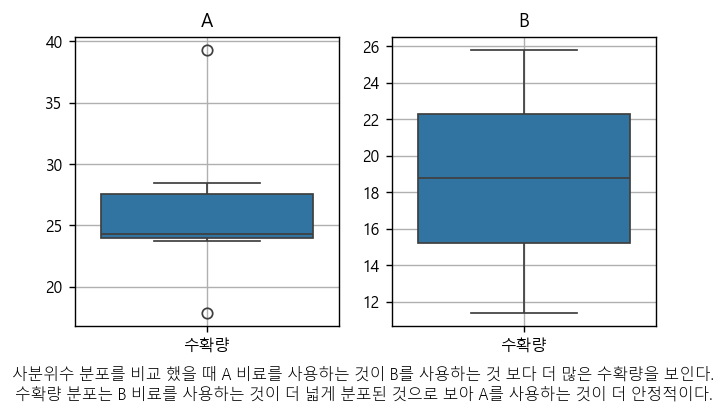

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), dpi=125)
sb.boxplot(data=df3A, ax=ax1)
sb.boxplot(data=df3B, ax=ax2)

ax1.set_title('A')
ax1.grid()

ax2.set_title('B')
ax2.grid()

txt = """사분위수 분포를 비교 했을 때 A 비료를 사용하는 것이 B를 사용하는 것 보다 더 많은 수확량을 보인다.
수확량 분포는 B 비료를 사용하는 것이 더 넓게 분포된 것으로 보아 A를 사용하는 것이 더 안정적이다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 9, "weight": "light"})

plt.show()
plt.close()

## 문제4

### 데이터 가져오기

In [13]:
df4 = read_excel("https://data.hossam.kr/pydata/analysis_grade.xlsx")
df4.head()

,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67


In [14]:
df4A = df4.query("학과=='A'").reset_index(drop=True)
df4A.head()

,학과,점수
0,A,52
1,A,37
2,A,67
3,A,73
4,A,15


In [15]:
df4C = df4.query("학과=='C'").reset_index(drop=True)
df4C.head()

,학과,점수
0,C,54
1,C,41
2,C,43
3,C,51
4,C,55


In [16]:
merge(df4A.describe(),
      df4C.describe(),
      left_index=True, right_index=True).T.rename(index={'점수_x': 'A', '점수_y': 'C'})

,count,mean,std,min,25%,50%,75%,max
A,20.0,43.750000,20.229928,10.0,29.50,42.5,55.00,78.0
C,12.0,56.166667,14.689720,41.0,50.25,52.5,54.25,90.0


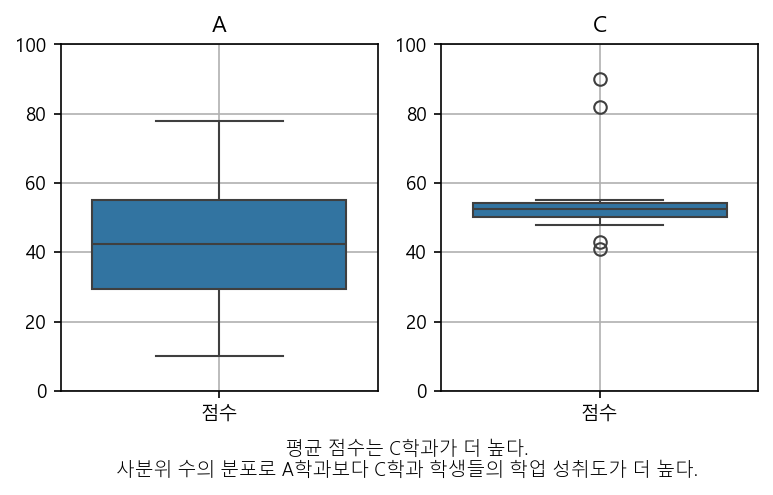

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), dpi=150)
sb.boxplot(data=df4A, ax=ax1)
sb.boxplot(data=df4C, ax=ax2)

ax1.set_title('A')
ax1.grid()
ax1.set_ylim([0, 100])

ax2.set_title('C')
ax2.grid()
ax2.set_ylim([0, 100])

txt = """평균 점수는 C학과가 더 높다.
사분위 수의 분포로 A학과보다 C학과 학생들의 학업 성취도가 더 높다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 9, "weight": "light"})

plt.show()
plt.close()

## 문제5

### 데이터 가져오기

In [18]:
df5 = read_excel("https://data.hossam.kr/pydata/stat_comp_grade.xlsx")
df5

,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


### (1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

In [19]:
df5['전공'] = df5['전공'].map({'STAT': 1, "COMP": 2})
df5['전공'] = df5['전공'].astype('category')
df5

,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
7,1,47,57
8,1,94,82
9,2,49,57


### (2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [20]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
중간고사,20.0,65.15,19.647619,31.0,48.5,67.5,78.50,94.0
기말고사,20.0,75.65,15.597824,40.0,66.0,79.0,85.25,96.0


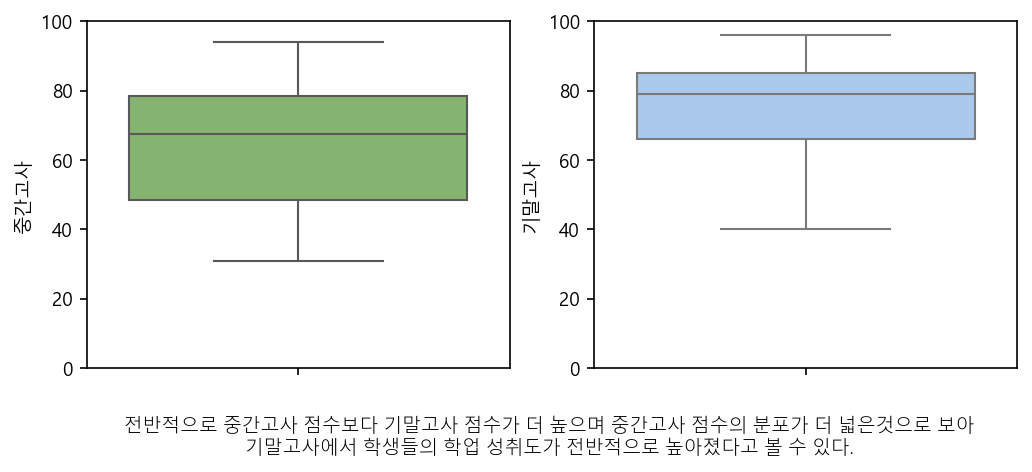

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), dpi=150)
sb.boxplot(data=df5, y="중간고사", ax=ax1, palette='summer')
sb.boxplot(data=df5, y="기말고사", ax=ax2, palette='pastel')


ax1.set_ylim([0, 100])
ax2.set_ylim([0, 100])

txt = """전반적으로 중간고사 점수보다 기말고사 점수가 더 높으며 중간고사 점수의 분포가 더 넓은것으로 보아
기말고사에서 학생들의 학업 성취도가 전반적으로 높아졌다고 볼 수 있다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 9, "weight": "light"})

plt.show()
plt.close()

### (3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [22]:
hist1, bins1 = np.histogram(df5['중간고사'], bins=5)
bins1 = np.round(bins1, 1)
bins1

array([31. , 43.6, 56.2, 68.8, 81.4, 94. ])

In [23]:
hist2, bins2 = np.histogram(df5['기말고사'], bins=5)
bins2 = np.round(bins2, 1)
bins2

array([40. , 51.2, 62.4, 73.6, 84.8, 96. ])

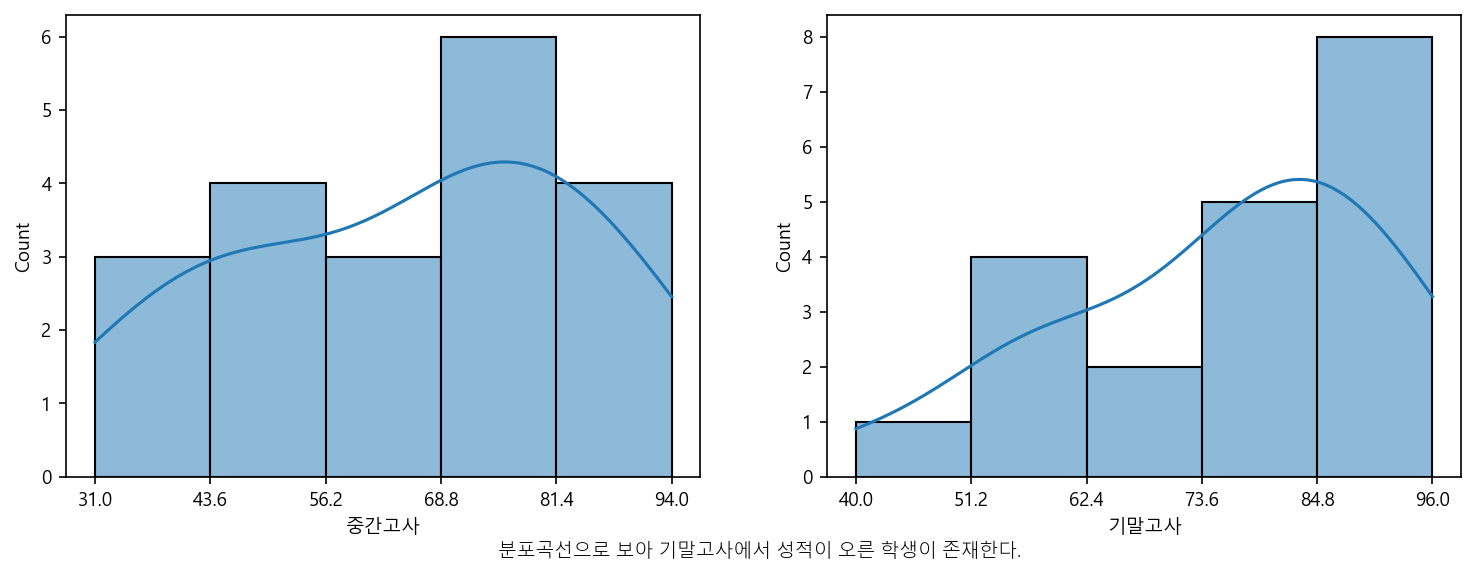

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
sb.histplot(data=df5, x="중간고사", bins=5, ax=ax1, kde=True)
sb.histplot(data=df5, x="기말고사", bins=5, ax=ax2, kde=True)
ax1.set_xticks(bins1)
ax1.set_xticklabels(bins1)
ax2.set_xticks(bins2)
ax2.set_xticklabels(bins2)

txt = """분포곡선으로 보아 기말고사에서 성적이 오른 학생이 존재한다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 9, "weight": "light"})

plt.show()
plt.close()

### (4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

In [25]:
STAT_df = df5.query("전공==1")
STAT_df

,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
7,1,47,57
8,1,94,82
10,1,38,53
11,1,65,70
12,1,47,60
13,1,88,95
16,1,92,95


In [26]:
COMP_df = df5.query("전공==2")
COMP_df

,전공,중간고사,기말고사
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
9,2,49,57
14,2,80,85
15,2,87,90
19,2,76,85


In [27]:
bins_list = [0, 20, 40, 60, 80, 100]

In [28]:
stat_hist1, stat_bins1 = np.histogram(STAT_df['중간고사'], bins=bins_list)
stat_bins1 = np.round(stat_bins1, 1)
stat_bins1

array([  0,  20,  40,  60,  80, 100])

In [29]:
stat_hist2, stat_bins2 = np.histogram(STAT_df['기말고사'], bins=bins_list)
stat_bins2 = np.round(stat_bins2, 1)
stat_bins2

array([  0,  20,  40,  60,  80, 100])

In [30]:
compu_hist1, compu_bins1 = np.histogram(STAT_df['중간고사'], bins=bins_list)
compu_bins1

array([  0,  20,  40,  60,  80, 100])

In [31]:
compu_hist2, compu_bins2 = np.histogram(STAT_df['기말고사'], bins=bins_list)
compu_bins2

array([  0,  20,  40,  60,  80, 100])

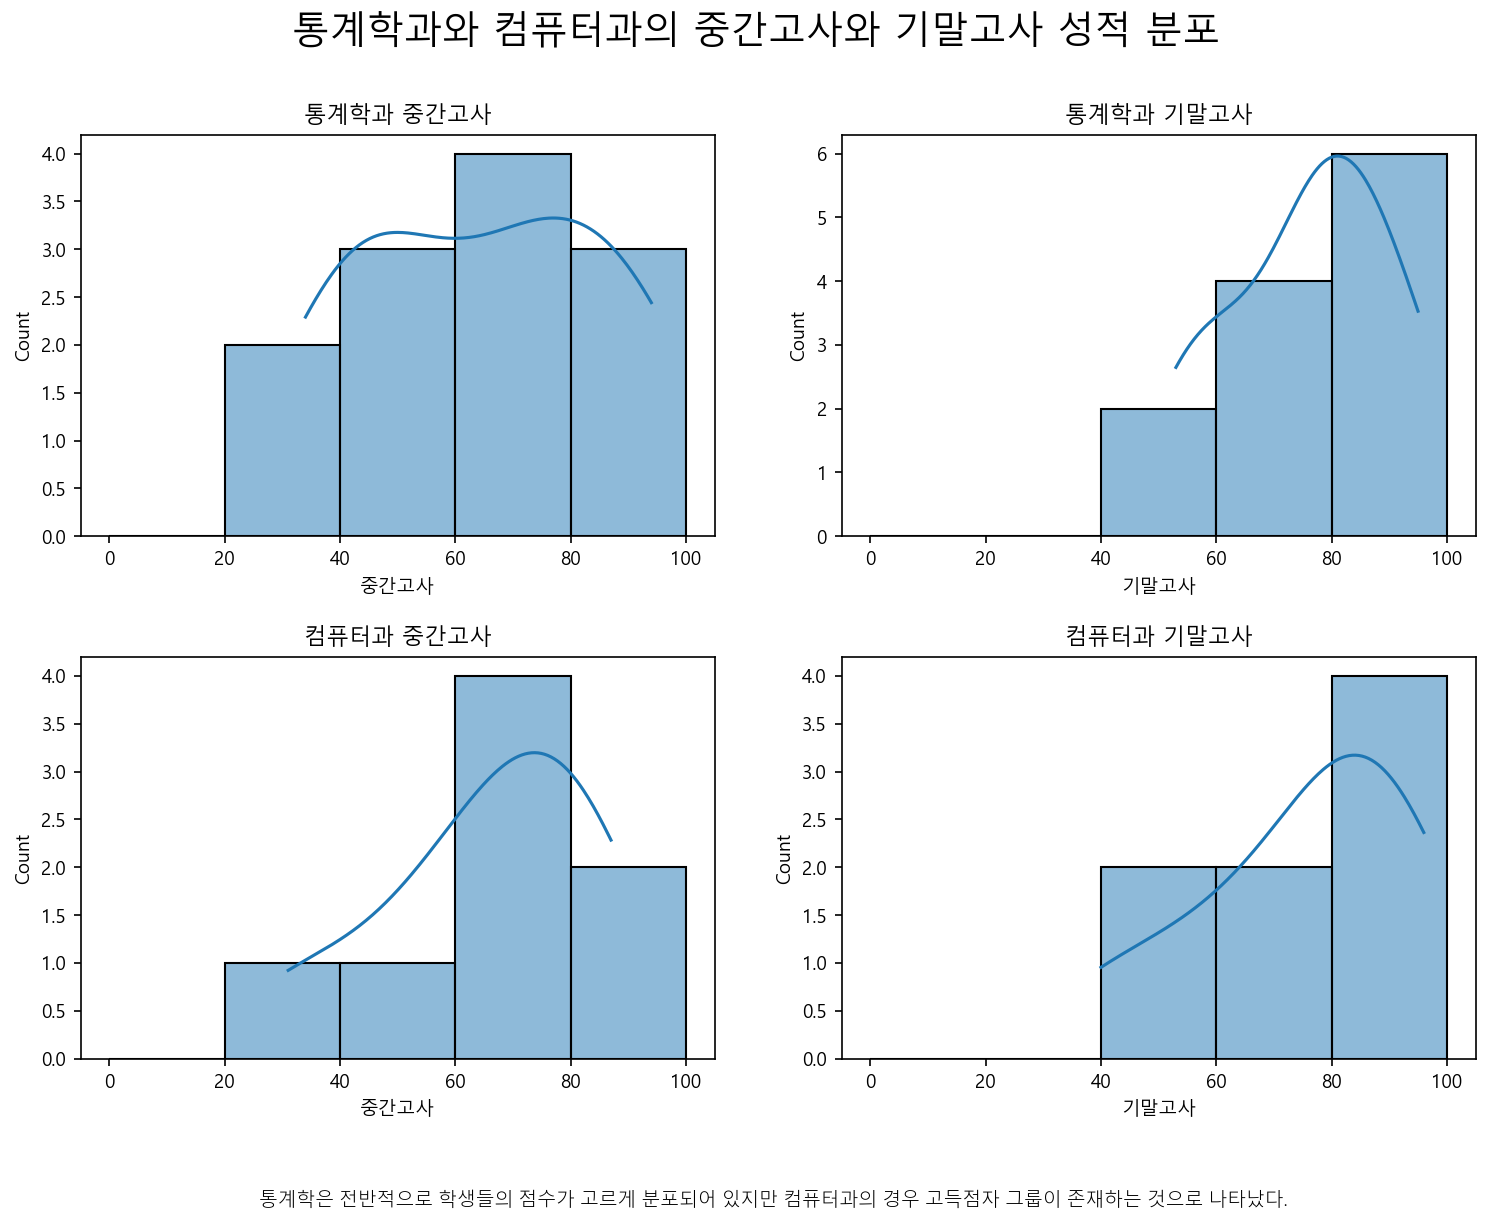

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), dpi=150)

fig.suptitle('통계학과와 컴퓨터과의 중간고사와 기말고사 성적 분포', fontsize=18)
fig.subplots_adjust(hspace=0.3)

sb.histplot(data=STAT_df, x="중간고사", bins=bins_list, ax=ax1, kde=True)
ax1.title.set_text("통계학과 중간고사")
ax1.set_xticks(stat_bins1)
ax1.set_xticklabels(stat_bins1)

sb.histplot(data=STAT_df, x="기말고사", bins=bins_list, ax=ax2, kde=True)
ax2.title.set_text("통계학과 기말고사")
ax2.set_xticks(stat_bins2)
ax2.set_xticklabels(stat_bins2)

sb.histplot(data=COMP_df, x="중간고사", bins=bins_list, ax=ax3, kde=True)
ax3.title.set_text("컴퓨터과 중간고사")
ax3.set_xticks(compu_bins1)
ax3.set_xticklabels(compu_bins1)

sb.histplot(data=COMP_df, x="기말고사", bins=bins_list, ax=ax4, kde=True)
ax4.title.set_text("컴퓨터과 기말고사")
ax4.set_xticks(compu_bins2)
ax4.set_xticklabels(compu_bins2)

txt = """통계학은 전반적으로 학생들의 점수가 고르게 분포되어 있지만 컴퓨터과의 경우 고득점자 그룹이 존재하는 것으로 나타났다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 9, "weight": "light"})

plt.show()
plt.close()

## 문제6

### (1) 데이터를 로드하여 명목형 변수를 1, 2 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.

In [33]:
df6 = read_excel('https://data.hossam.kr/pydata/wage.xlsx')
df6

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [34]:
df6.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [35]:
ilist = df6.dtypes.index
ilist

Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [36]:
vlist = df6.dtypes.values
vlist

array([dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64')], dtype=object)

In [37]:
df6cp = df6.copy()

for i, v in enumerate(vlist):
    if v == 'object':
        map = {}
        field = ilist[i]
        print("[%s]" % field)
        print(sorted(df6cp[field].unique()))

        for i, v in enumerate(sorted(df6cp[field].unique())):
            map[v] = i
            print("\t'%s': %d" % (v, i))
        print(map)
        df6cp[field] = df6cp[field].map(map)

df6cp

[maritl]
['1. Never Married', '2. Married', '3. Widowed', '4. Divorced', '5. Separated']
	'1. Never Married': 0
	'2. Married': 1
	'3. Widowed': 2
	'4. Divorced': 3
	'5. Separated': 4
{'1. Never Married': 0, '2. Married': 1, '3. Widowed': 2, '4. Divorced': 3, '5. Separated': 4}
[race]
['1. White', '2. Black', '3. Asian', '4. Other']
	'1. White': 0
	'2. Black': 1
	'3. Asian': 2
	'4. Other': 3
{'1. White': 0, '2. Black': 1, '3. Asian': 2, '4. Other': 3}
[education]
['1. < HS Grad', '2. HS Grad', '3. Some College', '4. College Grad', '5. Advanced Degree']
	'1. < HS Grad': 0
	'2. HS Grad': 1
	'3. Some College': 2
	'4. College Grad': 3
	'5. Advanced Degree': 4
{'1. < HS Grad': 0, '2. HS Grad': 1, '3. Some College': 2, '4. College Grad': 3, '5. Advanced Degree': 4}
[region]
['2. Middle Atlantic']
	'2. Middle Atlantic': 0
{'2. Middle Atlantic': 0}
[jobclass]
['1. Industrial', '2. Information']
	'1. Industrial': 0
	'2. Information': 1
{'1. Industrial': 0, '2. Information': 1}
[health]
['1. <=Go

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,0,0,0,0,0,0,1,4.318063,75.043154
1,2004,24,0,0,3,0,1,1,1,4.255273,70.476020
2,2003,45,1,0,2,0,0,0,0,4.875061,130.982177
3,2003,43,1,2,3,0,1,1,0,5.041393,154.685293
4,2005,50,3,0,1,0,1,0,0,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,1,0,2,0,0,1,0,5.041393,154.685293
2996,2007,30,1,0,1,0,0,1,1,4.602060,99.689464
2997,2005,27,1,1,0,0,0,0,1,4.193125,66.229408
2998,2005,27,0,0,2,0,0,1,0,4.477121,87.981033


### (2) 레이블링 된 명목형 변수를 category 타입으로 변경하시오.

In [38]:
for i, v in enumerate(vlist):
    if v == 'object':
        field = ilist[i]
        df6cp[field] = df6cp[field].astype('category')

df6cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   int64   
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(7), float64(2), int64(2)
memory usage: 115.5 KB


### (3) 수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)

In [39]:
df6cp.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


> 조사 인원은 3000명이다.
>
> 조사 인원의 연령은 18세~80세 까지 이고, 평균 연령은 42.4세이다.
>
> 조사 인원의 임금은 20~318이고, 평균 임금은 111.7, 로그 변환 값은 4.65이다.
>
> 연령에 대한 표준 편차는 11.5이고, 임금의 표준 편차는 41.73이다.
>
> 임금에 대한 표준편차가 크다.

### (4) 명목형 변수에 대한 기술 통계를 수행하고 설명하시오.

In [44]:
cdf = df6.drop(['year', 'age', 'logwage', 'wage'], axis=1)
count = len(cdf.columns)
rows = round(count/2)
cols = 2

print(count, rows, cols)

7 4 2


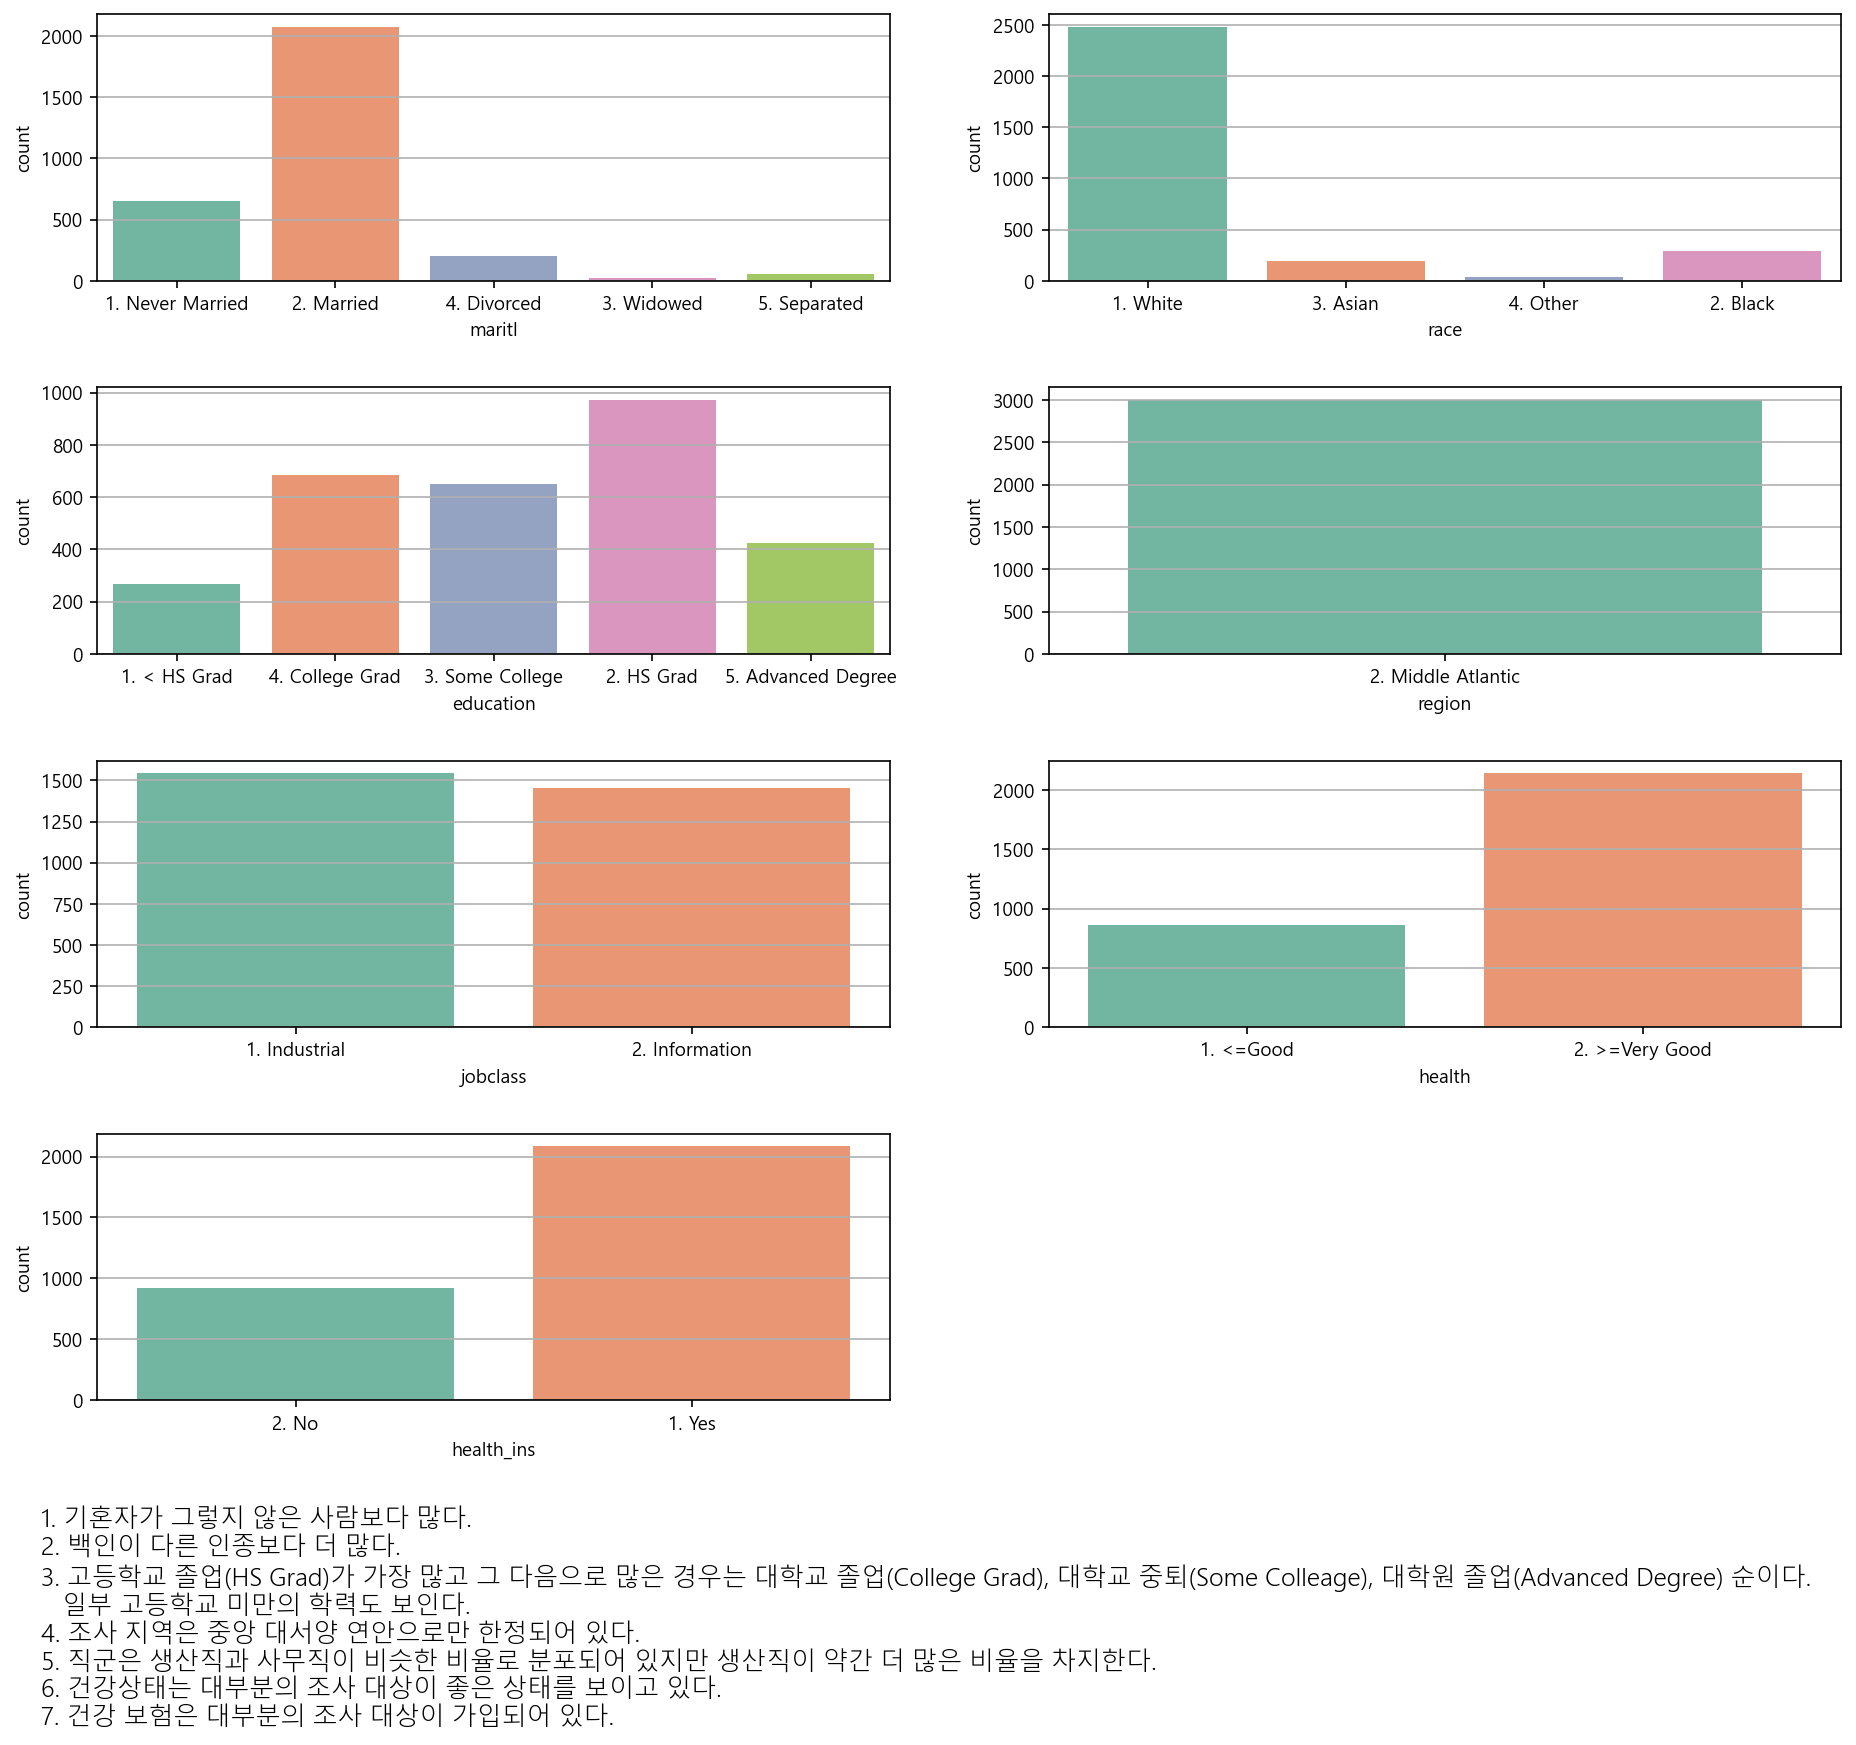

In [46]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*3), dpi=150)
fig.subplots_adjust(hspace=0.4)

for i in range(rows):
    for j in range(cols):
        idx = i * cols + j

        if idx >= count:
            axes[i][j].axis('off')
            break

        axes[i][j].grid()
        sb.countplot(data=df6, x=cdf.columns[idx], ax=axes[i][j], palette='Set2')

txt = """1. 기혼자가 그렇지 않은 사람보다 많다.
2. 백인이 다른 인종보다 더 많다.
3. 고등학교 졸업(HS Grad)가 가장 많고 그 다음으로 많은 경우는 대학교 졸업(College Grad), 대학교 중퇴(Some Colleage), 대학원 졸업(Advanced Degree) 순이다.
   일부 고등학교 미만의 학력도 보인다.
4. 조사 지역은 중앙 대서양 연안으로만 한정되어 있다.
5. 직군은 생산직과 사무직이 비슷한 비율로 분포되어 있지만 생산직이 약간 더 많은 비율을 차지한다.
6. 건강상태는 대부분의 조사 대상이 좋은 상태를 보이고 있다.
7. 건강 보험은 대부분의 조사 대상이 가입되어 있다."""

plt.figtext(0.1, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="left",
            fontdict={"size": 12, "weight": "light"})

plt.show()
plt.close()

### (5) 결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

In [47]:
vcount = df6['maritl'].value_counts().sort_index()
vcount.index

Index(['1. Never Married', '2. Married', '3. Widowed', '4. Divorced',
       '5. Separated'],
      dtype='object', name='maritl')

1. Never Married
2. Married
3. Widowed
4. Divorced
5. Separated


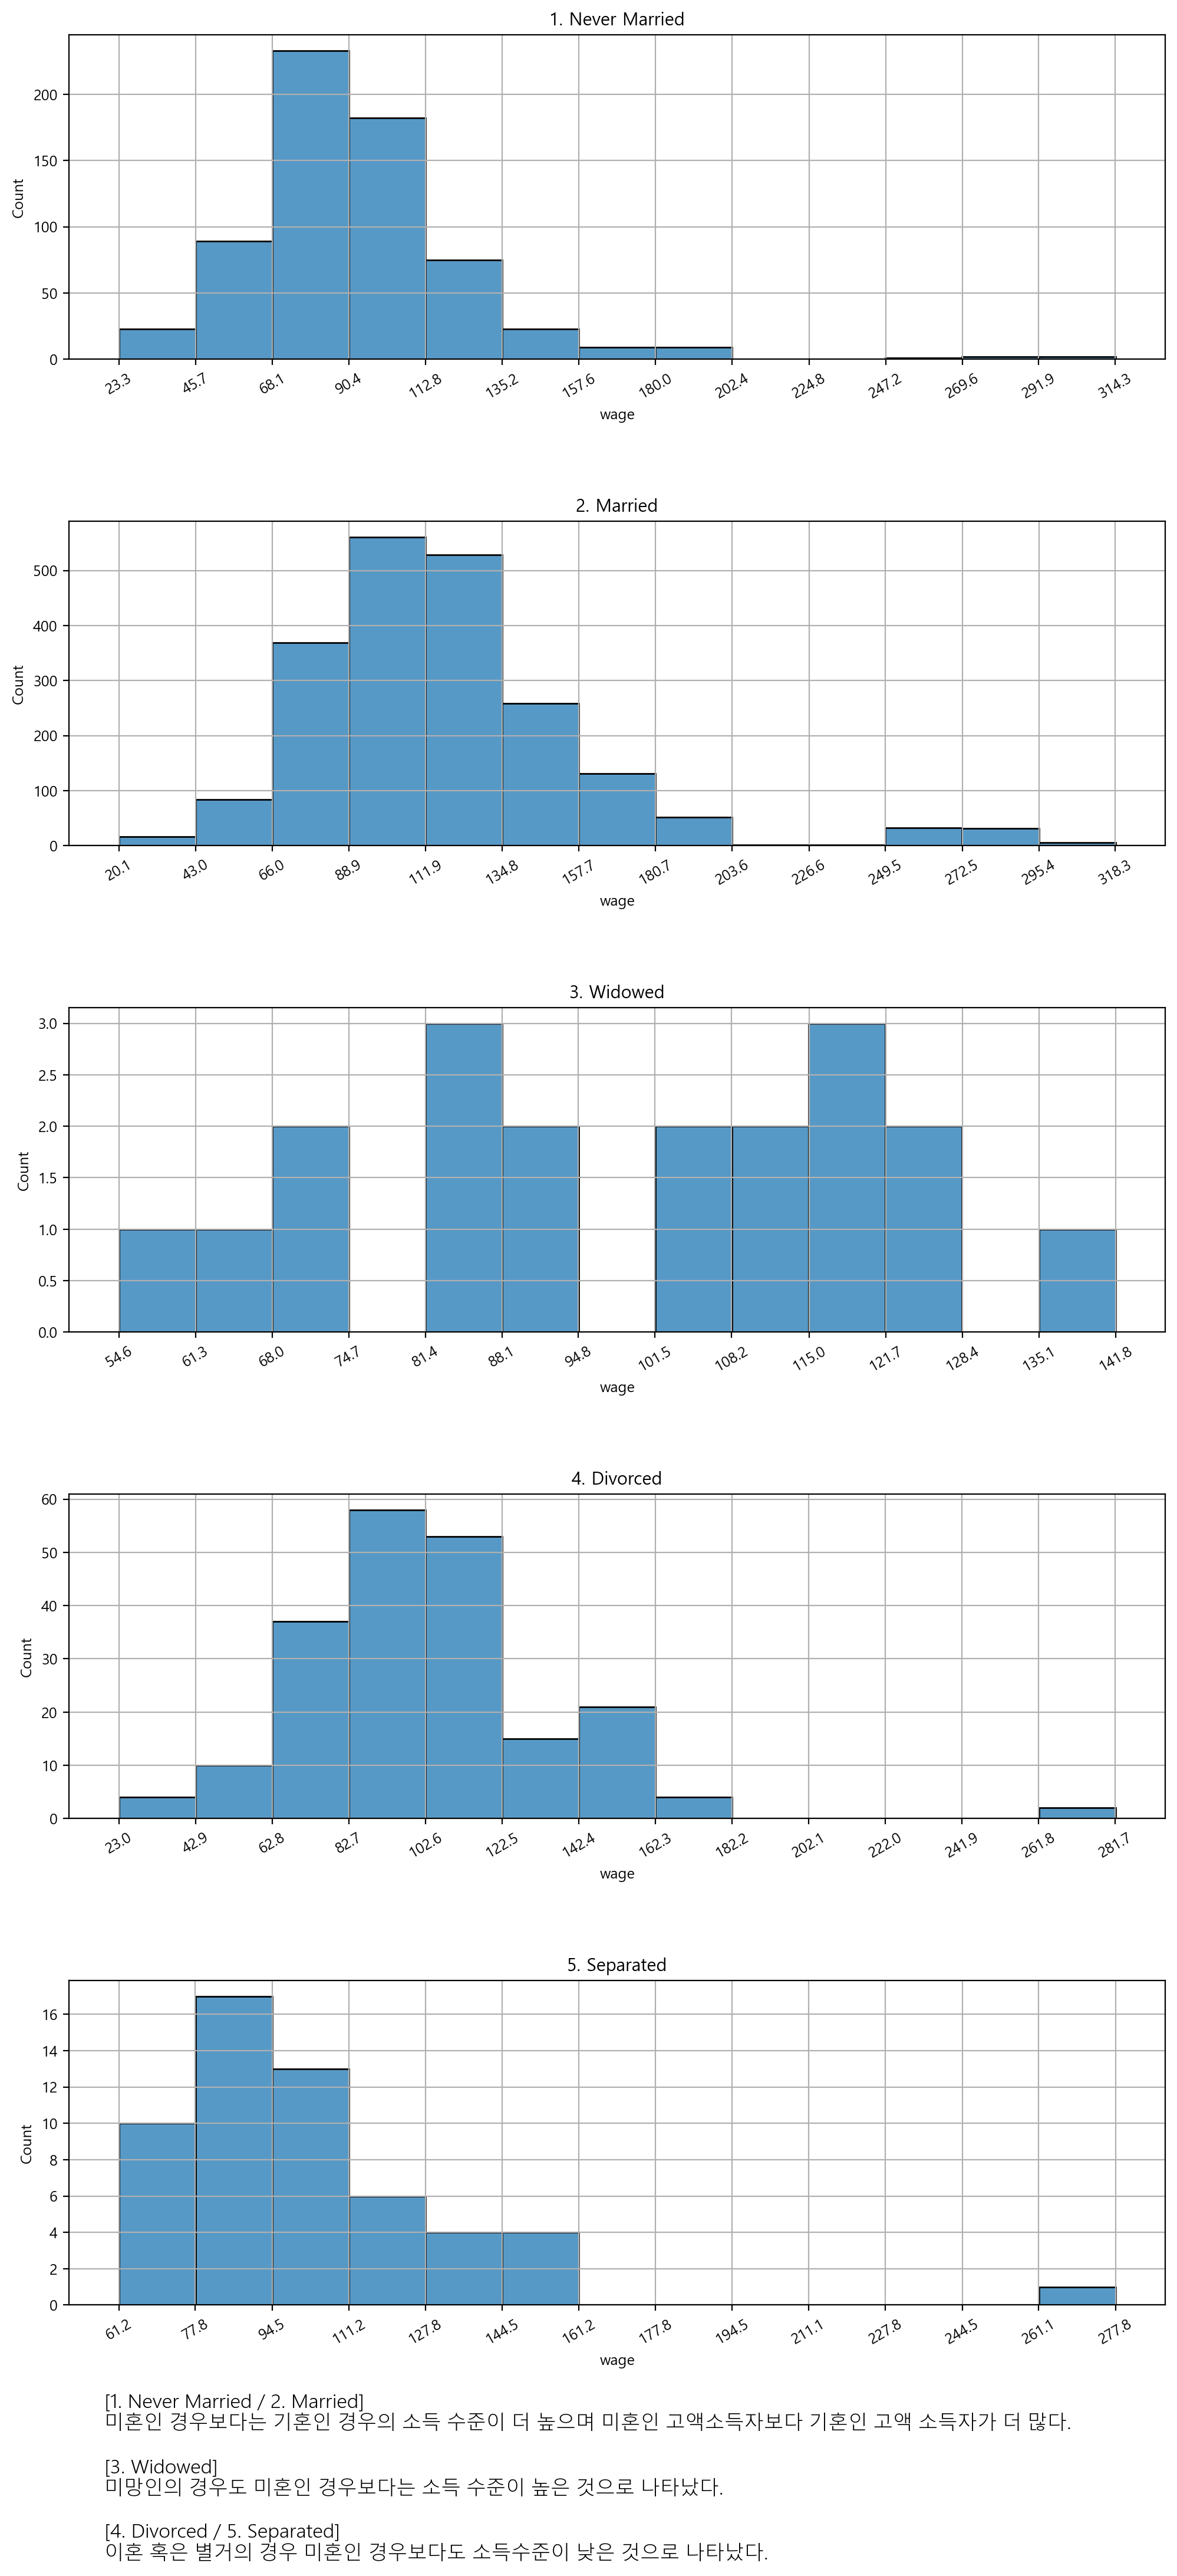

In [50]:
fig, ax = plt.subplots(len(vcount.index), 1, figsize=(12, 25))

fig.subplots_adjust(hspace=0.5)

for i, v in enumerate(vcount.index):
    mdf = df6.query("maritl == @v")
    print(v)

    hist, bins = np.histogram(mdf['wage'], bins=13)
    bins = np.round(bins, 1)
    sb.histplot(data=mdf, x='wage', bins=13, ax=ax[i])
    ax[i].set_title(v)
    ax[i].set_xticks(bins)
    ax[i].set_xticklabels(bins, rotation=30)
    ax[i].grid()

txt = """[1. Never Married / 2. Married]
미혼인 경우보다는 기혼인 경우의 소득 수준이 더 높으며 미혼인 고액소득자보다 기혼인 고액 소득자가 더 많다.

[3. Widowed]
미망인의 경우도 미혼인 경우보다는 소득 수준이 높은 것으로 나타났다.

[4. Divorced / 5. Separated]
이혼 혹은 별거의 경우 미혼인 경우보다도 소득수준이 낮은 것으로 나타났다."""
plt.figtext(0.15, 0.08, txt, wrap=True,
            verticalalignment="top", horizontalalignment="left",
            fontdict={"size": 12, "weight": "light"})

plt.show()
plt.close()

### (6) 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

In [51]:
vcount = df6['education'].value_counts().sort_index()
vcount

education
1. < HS Grad          268
2. HS Grad            971
3. Some College       650
4. College Grad       685
5. Advanced Degree    426
Name: count, dtype: int64

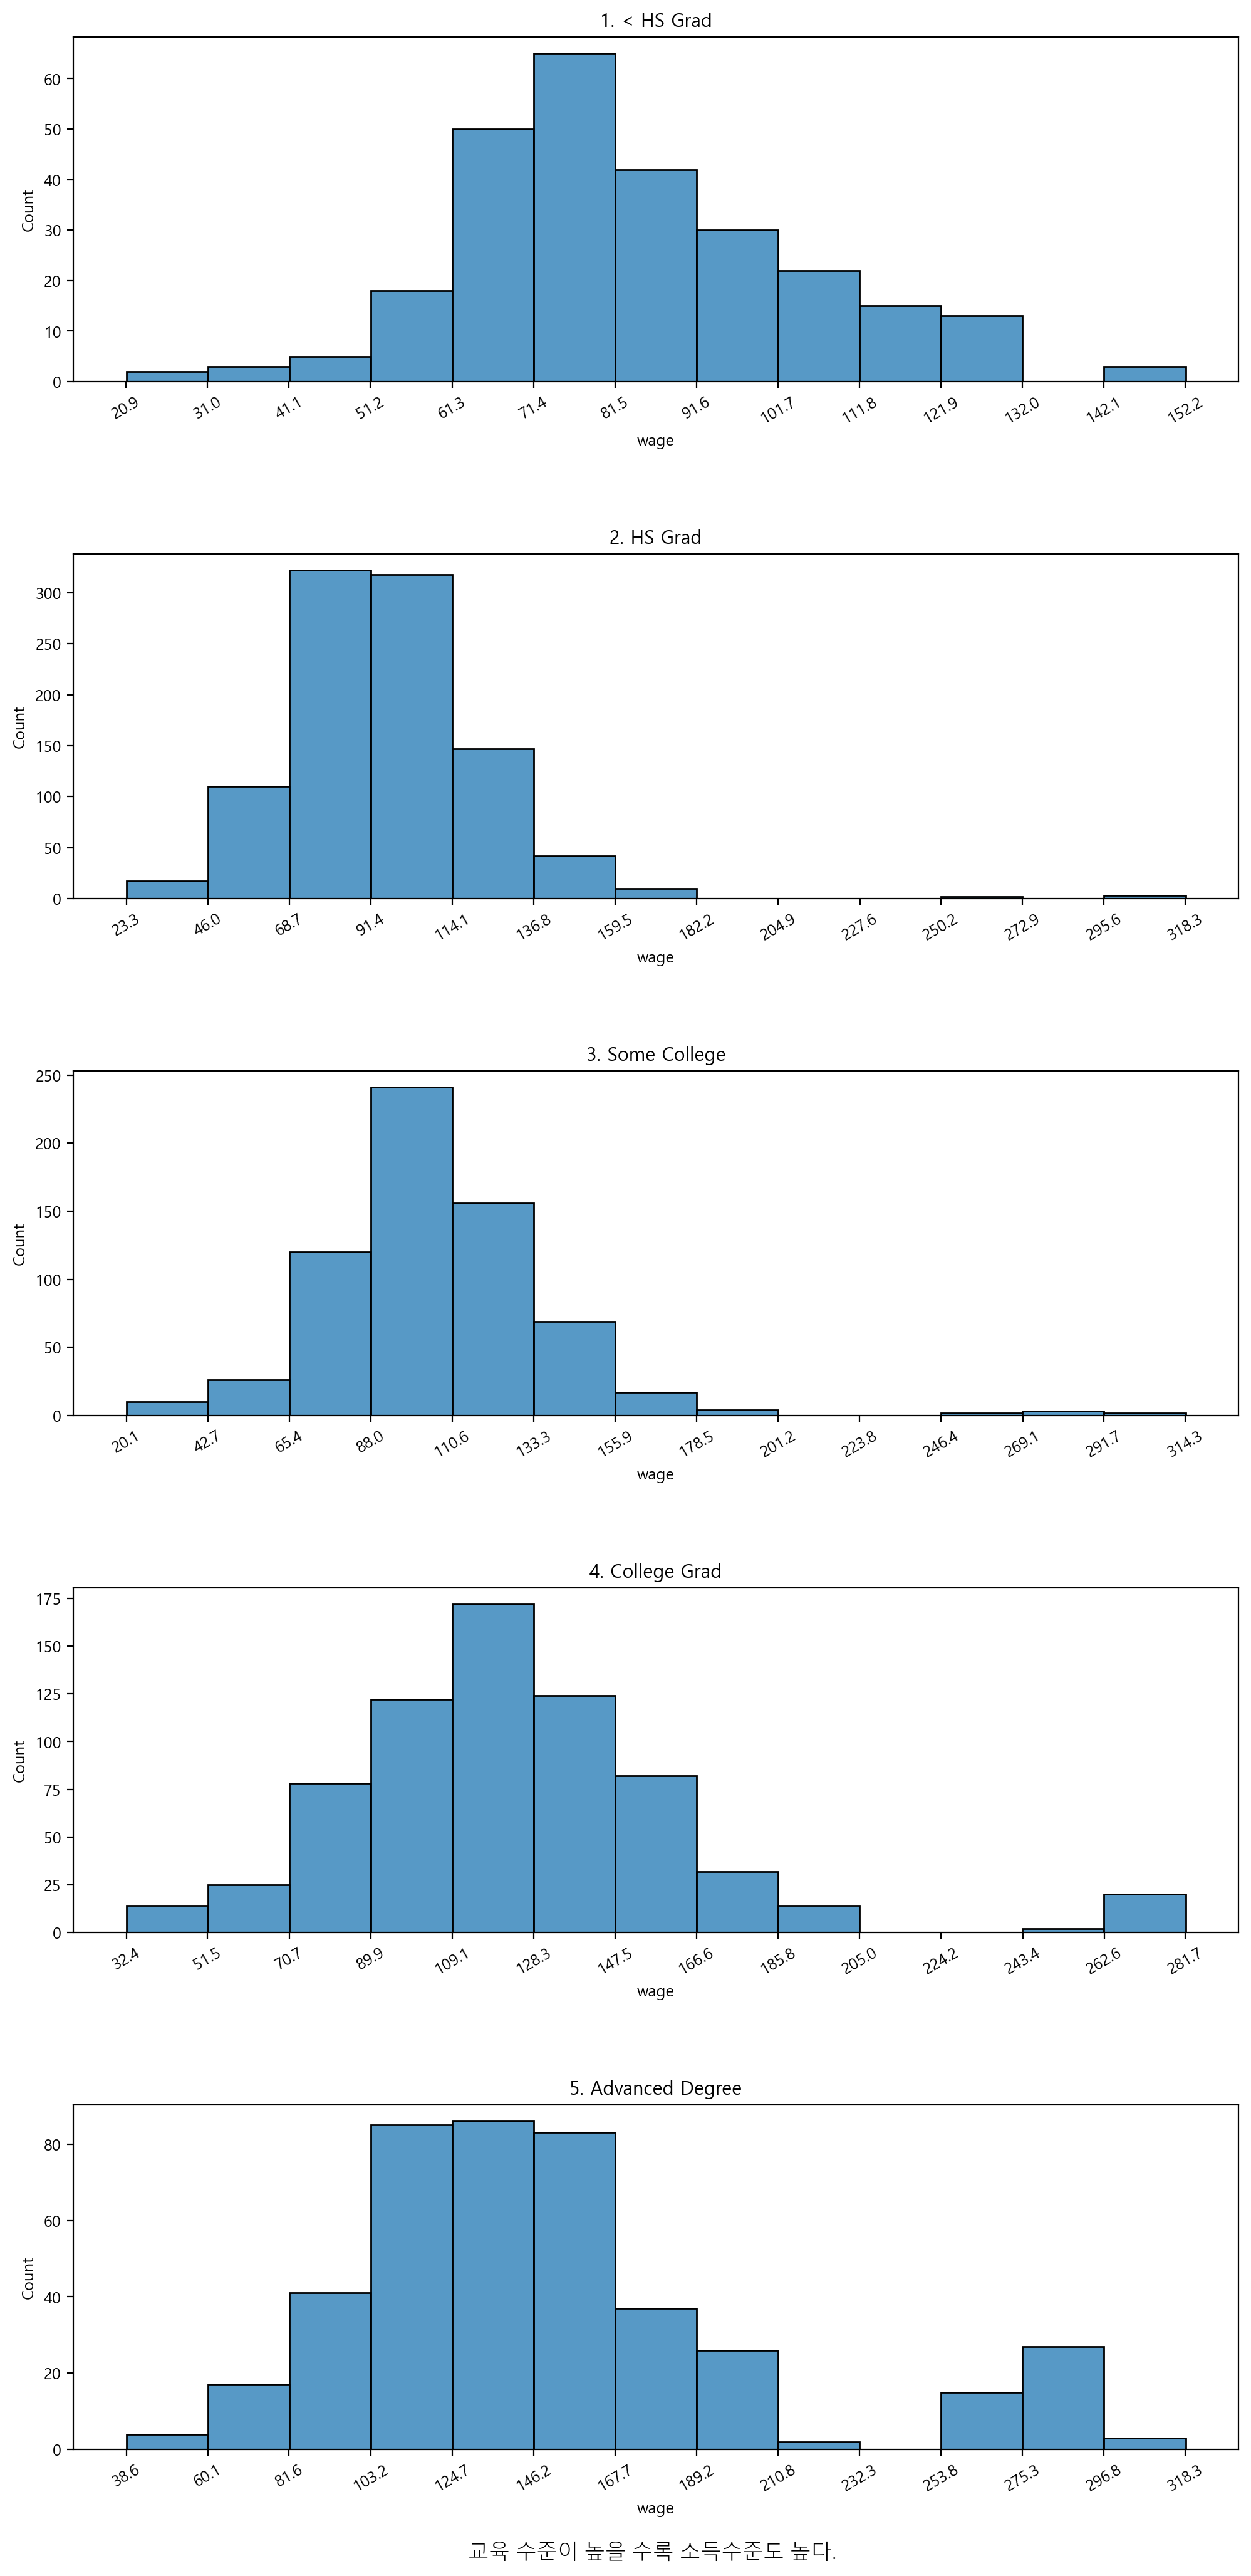

In [52]:
fig, ax = plt.subplots(len(vcount.index), 1, figsize=(12, 25))

fig.subplots_adjust(hspace=0.5)

for i, v in enumerate(vcount.index):
    mdf = df6.query("education == @v")
    hist, bins = np.histogram(mdf['wage'], bins=13)
    bins = np.round(bins, 1)
    sb.histplot(data=mdf, x='wage', bins=13, ax=ax[i])
    ax[i].set_title(v)
    ax[i].set_xticks(bins)
    ax[i].set_xticklabels(bins, rotation=30)

txt = """교육 수준이 높을 수록 소득수준도 높다."""
plt.figtext(0.51, 0.08, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.show()
plt.close()

### [7] 직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.

In [53]:
hdf = df6.filter(['jobclass', 'health'])
hdf

,jobclass,health
0,1. Industrial,1. <=Good
1,2. Information,2. >=Very Good
2,1. Industrial,1. <=Good
3,2. Information,2. >=Very Good
4,2. Information,1. <=Good
...,...,...
2995,1. Industrial,2. >=Very Good
2996,1. Industrial,2. >=Very Good
2997,1. Industrial,1. <=Good
2998,1. Industrial,2. >=Very Good


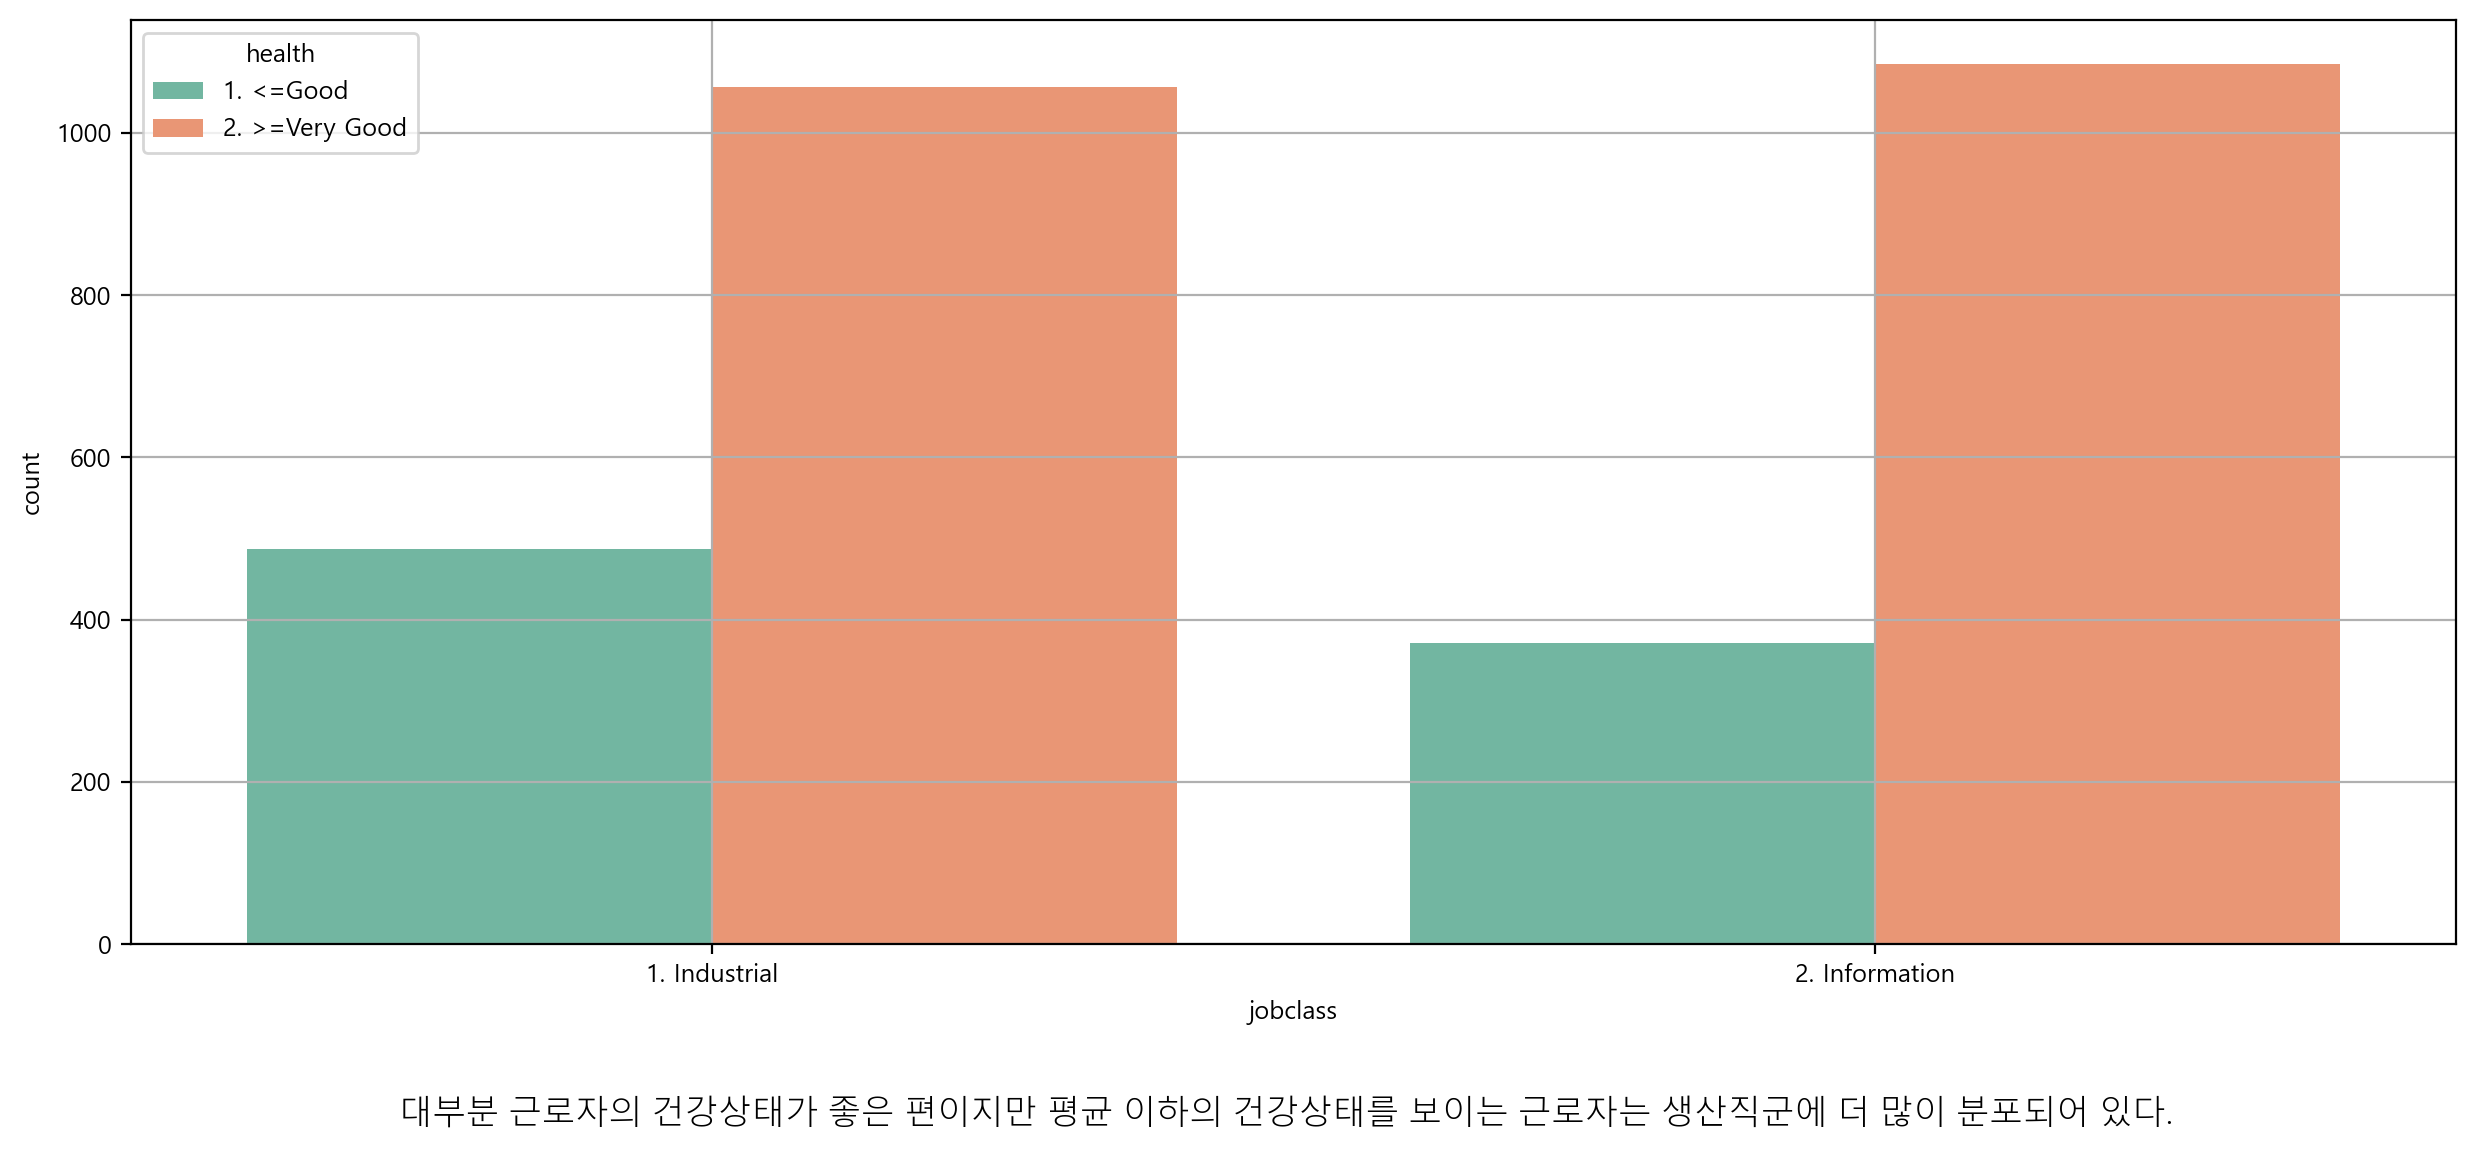

In [54]:
plt.figure()
sb.countplot(data=hdf, x='jobclass', hue='health', palette='Set2')
plt.grid()

txt = """대부분 근로자의 건강상태가 좋은 편이지만 평균 이하의 건강상태를 보이는 근로자는 생산직군에 더 많이 분포되어 있다."""
plt.figtext(0.51, -0.02, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.show()
plt.close()

### (8) 교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.

In [55]:
edf = cdf.filter(['education', 'race'])
edf

,education,race
0,1. < HS Grad,1. White
1,4. College Grad,1. White
2,3. Some College,1. White
3,4. College Grad,3. Asian
4,2. HS Grad,1. White
...,...,...
2995,3. Some College,1. White
2996,2. HS Grad,1. White
2997,1. < HS Grad,2. Black
2998,3. Some College,1. White


In [56]:
race = sorted(edf['race'].unique())
race

['1. White', '2. Black', '3. Asian', '4. Other']

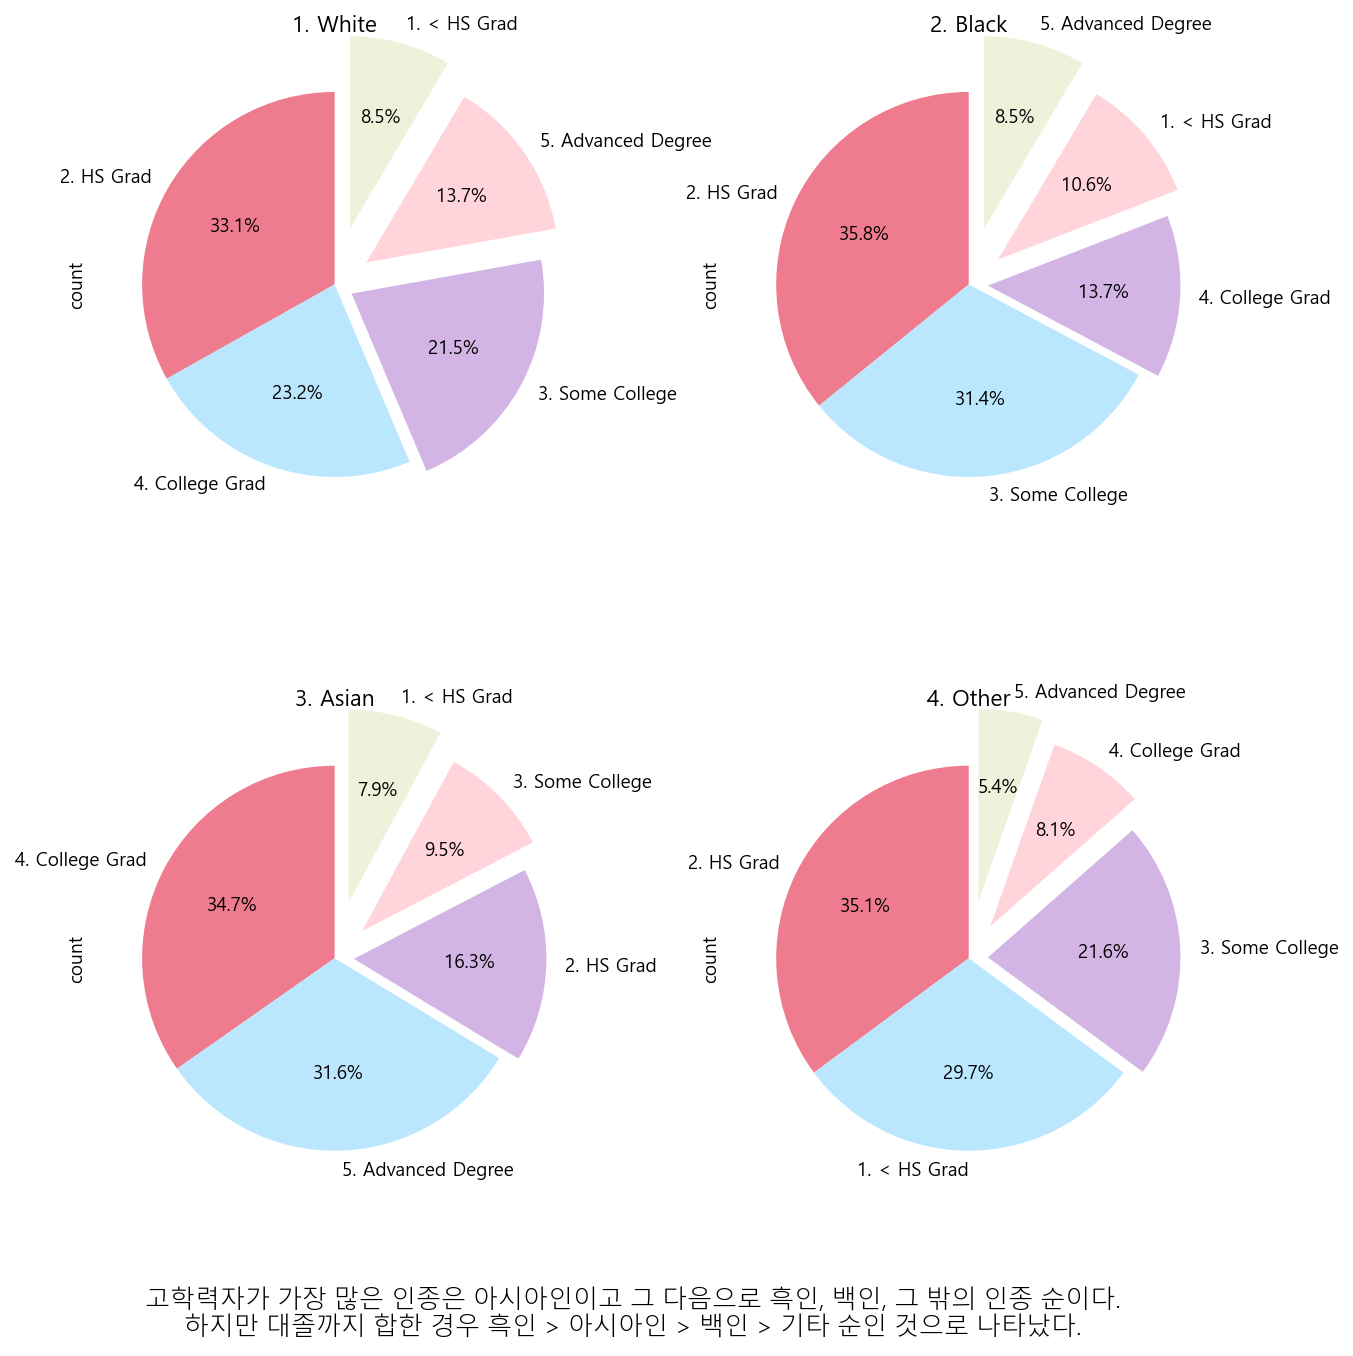

In [57]:
count = len(race)
rows = round(count // 2)
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, rows*5), dpi=150)
fig.subplots_adjust(hspace=0.4)

for i in range(rows):
    for j in range(cols):
        idx = i * cols + j
        if idx >= count:
            axes[i][j].axis('off')
            break

        axes[i][j].title.set_text(race[idx])
        axes[i][j].set(ylabel=None)
        mdf = edf[edf['race'] == race[idx]]
        mdf['education'].value_counts().plot.pie(ax=axes[i][j], autopct='%1.1f%%', startangle=90,
                                                 colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#EFF1DB'],
                                                 explode=[0, 0, 0.1, 0.2, 0.3])

txt = """고학력자가 가장 많은 인종은 아시아인이고 그 다음으로 흑인, 백인, 그 밖의 인종 순이다.
하지만 대졸까지 합한 경우 흑인 > 아시아인 > 백인 > 기타 순인 것으로 나타났다."""

plt.figtext(0.5, 0.05, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.show()
plt.close()